In [1]:
%run "Anomaly Generation.ipynb"
%run "Cell Generation.ipynb"

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
['StudentID', 'StudyTimeWeekly', 'GPA']
['customer_id', 'credit_score', 'age', 'balance', 'estimated_salary']
['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'RiskScore']
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'credit_score']
['fetal_movement', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variabi

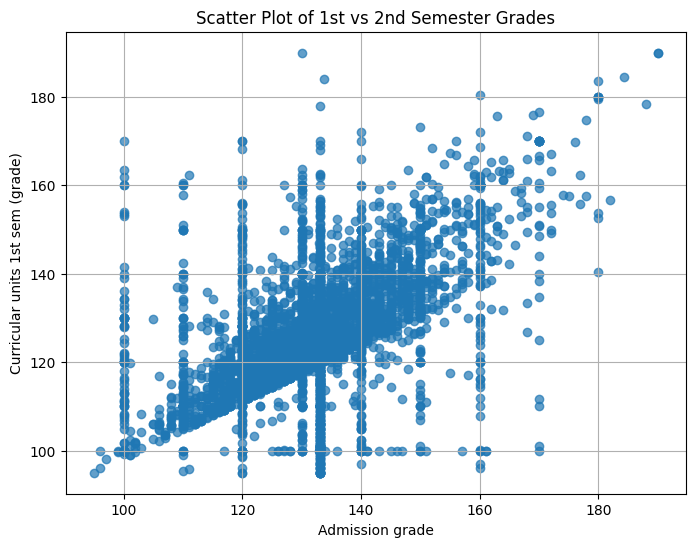

In [53]:
import matplotlib.pyplot as plt

df = pd.read_csv('Datasets/predict-dropout-or-academic-success.csv')
# Assuming you have a DataFrame called df
plt.figure(figsize=(8, 6))
plt.scatter(df['Previous qualification (grade)'], df['Admission grade'], alpha=0.7)
plt.xlabel('Admission grade')
plt.ylabel('Curricular units 1st sem (grade)')
plt.title('Scatter Plot of 1st vs 2nd Semester Grades')
plt.grid(True)
plt.show()


In [54]:
import time
def run_everything(rows=0.2, point=0.1, contextual=0.1, threshold=0.61, nu=0.999, eps=1):
    classify_datasets()
    true_set = run_inject(rows, point, contextual)
    classify_anomalous()
    time = time
    run_ocsvm(nu, gamma = 0.999)
    detected_set = classify_anomalous()
    generate_cell_values()

    for i in range(0, 1):
        #Convert lists to sets before using intersection
        correctly_detected = set(detected_set[i]).intersection(set(true_set[i]))

        # Calculate percentage
        if len(true_set[i]) == 0:
            print(f"Set {i}: No true anomalies, accuracy = 0%")
            continue  # Skip to next iteration

        print(len(detected_set[i]))
        print(len(true_set[i]))
        accuracy_percentage = (len(correctly_detected) / len(true_set[i])) * 100
        print(f"Set {i}: Detection Accuracy = {accuracy_percentage:.2f}%")


    for i in range(0, 1):
        indices1 = {tup[0] for tup in detected_set[i]}
        indices2 = {tup[0] for tup in true_set[i]}
    
        # Find the intersection (common indices)
        common_indices = set(indices1).intersection(set(indices2))
        print(len(common_indices))
        print(len(indices1))
        print(len(indices2))
    
        accuracy_percentage = (len(common_indices) / len(indices2)) * 100
        print(f"Set {i}: Detection Accuracy = {accuracy_percentage:.2f}%")



[]
[]


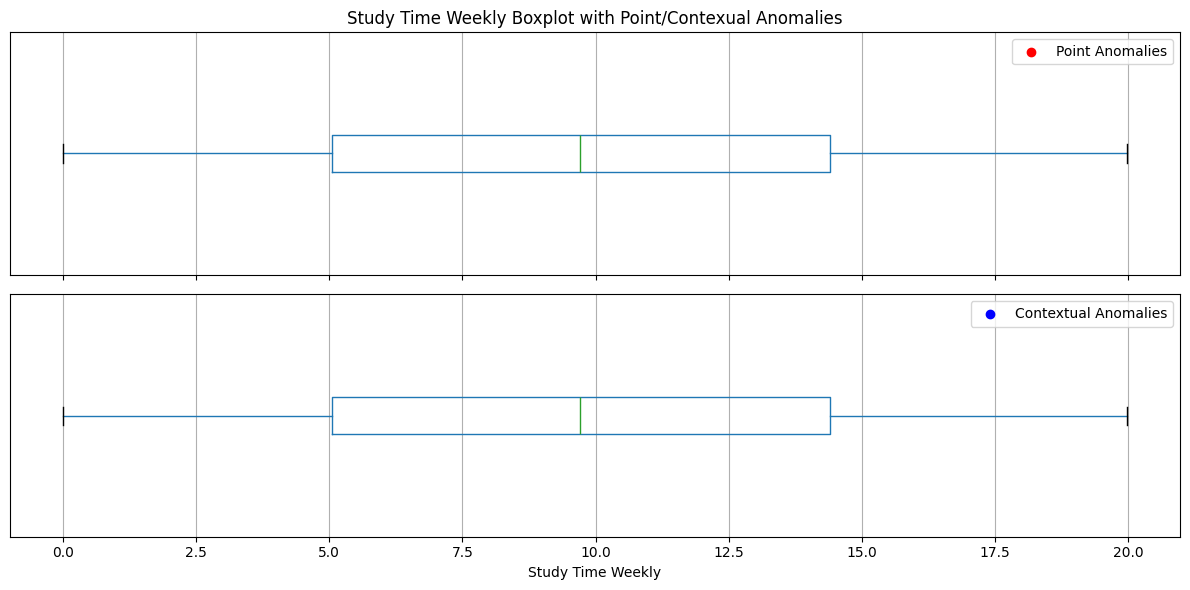

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Datasets/student-performance-dataset.csv')

# Set up 2 subplots (shared x-axis)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True)

# --- First subplot: point anomalies ---
true_set_point = run_inject(rows=1, point=0.1, contextual=0.000)
df_a = pd.read_csv('Datasets/student-performance-dataset_anomaly.csv')
stw_point = [item for sublist in true_set_point for item in sublist if item[1] == 'StudyTimeWeekly']
highlight_point = [df_a.loc[idx, 'StudyTimeWeekly'] for idx, _ in stw_point[:20]]
print(highlight_point)

# StudyTimeWeekly boxplot (horizontal)
df[['StudyTimeWeekly']].boxplot(vert=False, ax=axes[0])
axes[0].scatter(highlight_point, [1]*len(highlight_point), color='red', zorder=3, label='Point Anomalies')
axes[0].set_title('Study Time Weekly Boxplot with Point/Contexual Anomalies')
axes[0].legend()
axes[0].set_yticks([])

df = pd.read_csv('Datasets/student-performance-dataset.csv')
# --- Second subplot: contextual anomalies ---
true_set_contextual = run_inject(rows=1, point=0.000, contextual=0.1)
df_a = pd.read_csv('Datasets/student-performance-dataset_anomaly.csv')
stw_contextual = [item for sublist in true_set_contextual for item in sublist if item[1] == 'StudyTimeWeekly']
highlight_contextual = [df.loc[idx, 'StudyTimeWeekly'] for idx, _ in stw_contextual[:20]]
print(highlight_contextual)

df[['StudyTimeWeekly']].boxplot(vert=False, ax=axes[1])
axes[1].scatter(highlight_contextual, [1]*len(highlight_contextual), color='blue', zorder=3, label='Contextual Anomalies')
axes[1].legend()
axes[1].set_yticks([])

# Common formatting
plt.xlabel('Study Time Weekly')
plt.tight_layout()
plt.show()


In [56]:
# dbscan plot = run_everything(0.1, 0.4, 0.4, eps=0.33) min pts = 20
# 31.5% all cells
# 52.6% entries

In [57]:
# isolation Forest plot = run_everything(0.1,0.4,0.4, threshold=0.58)
# 26.7% all cells
# 43.89% all entries

4424
Dataset: Datasets/predict-dropout-or-academic-success.csv
Shape after dropping missing values: (4424, 37)
Test set size: (3539, 36)
Accuracy: 0.7615819209039548
Accuracy Whole: 0.7615819209039548
4424
Dataset: Datasets/predict-dropout-or-academic-success_anomaly.csv
Shape after dropping missing values: (4424, 37)
Test set size: (3539, 36)
Accuracy: 0.7661016949152543
Accuracy Whole: 0.7661016949152543
['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']


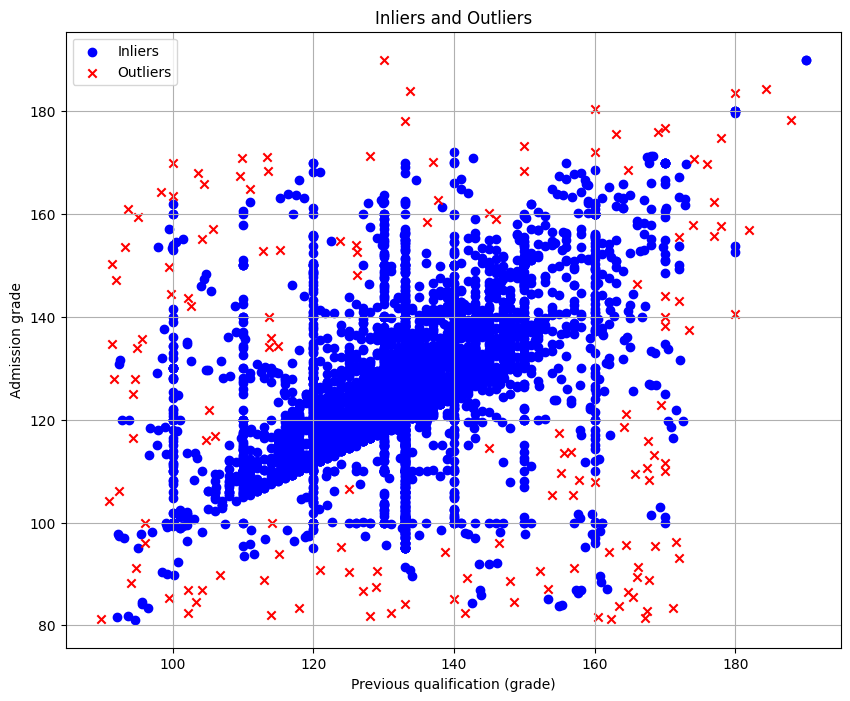

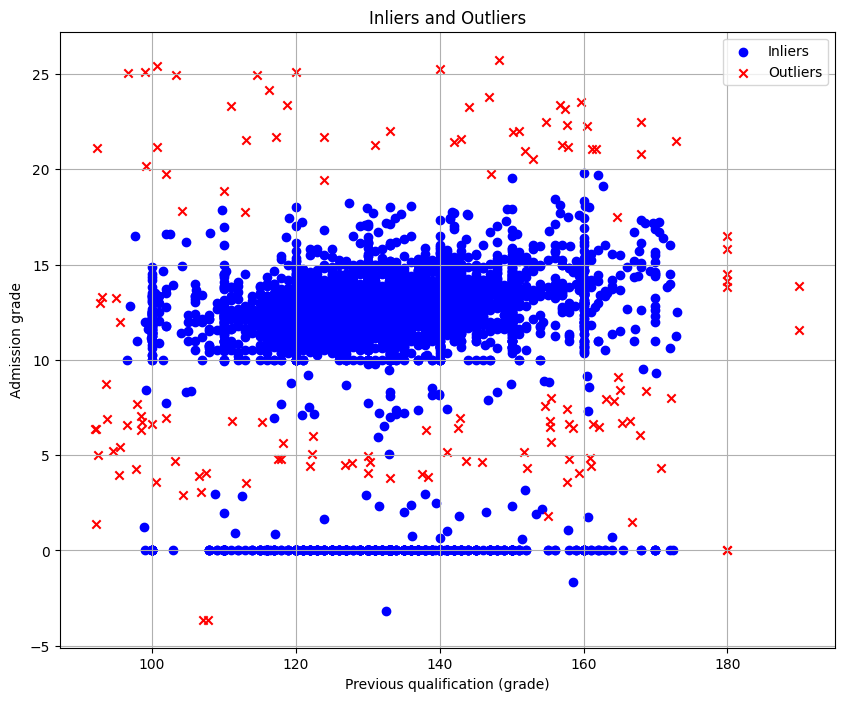

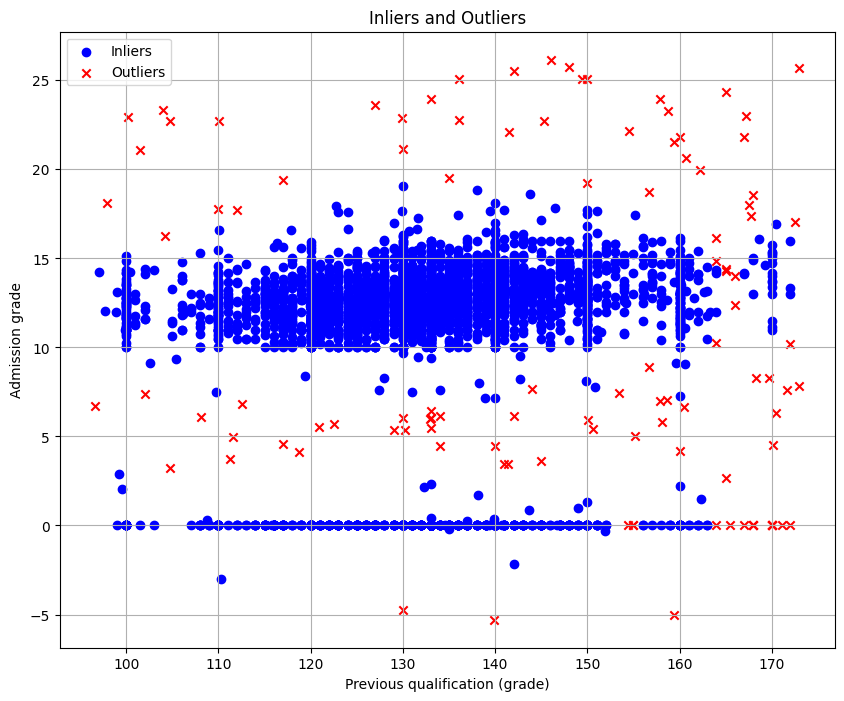

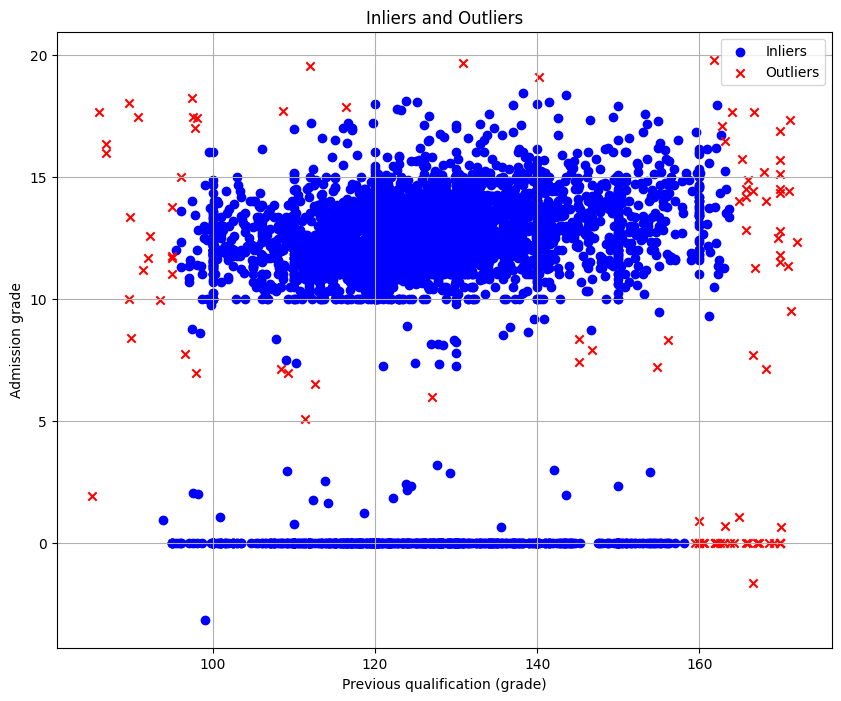

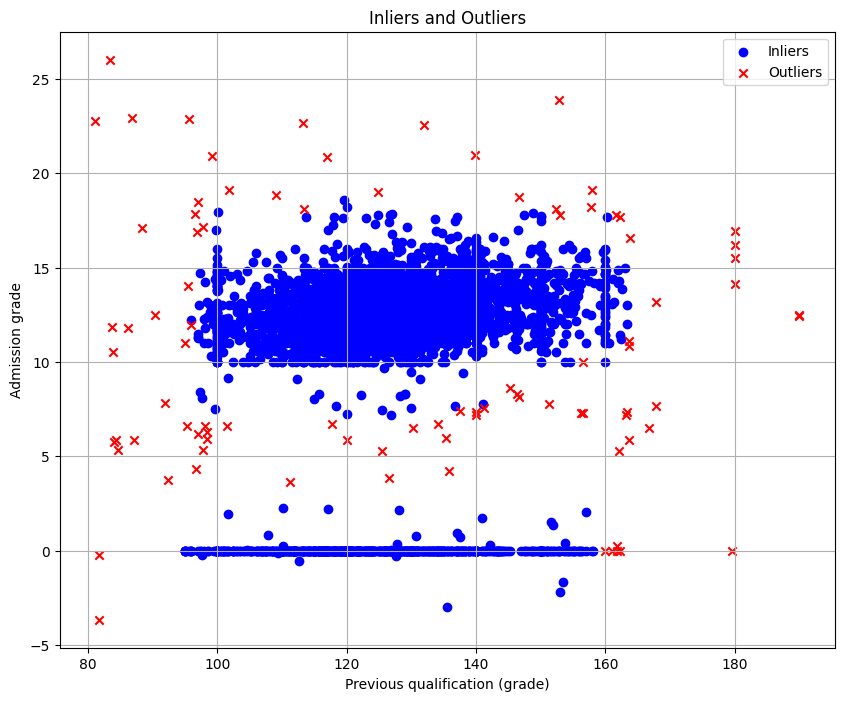

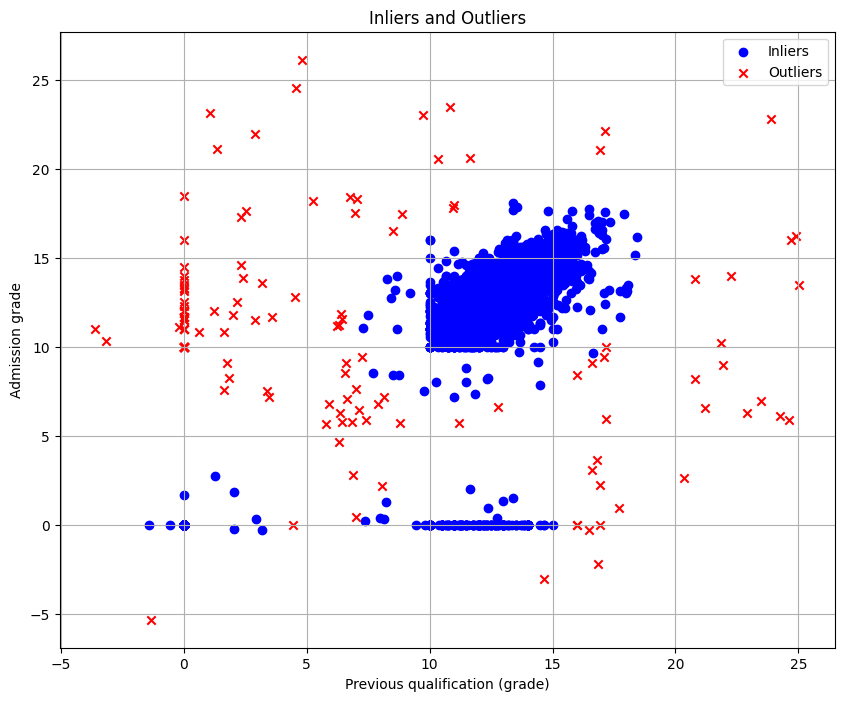

4424
Dataset: Datasets/predict-dropout-or-academic-success_anomaly.csv
Shape after dropping missing values: (3887, 37)
Test set size: (3109, 36)
Accuracy: 0.7570694087403599
Accuracy Whole: 0.6651737775257185
Total time taken: 38.37531113624573 seconds
4424
Dataset: Datasets/predict-dropout-or-academic-success_anomaly.csv
Shape after dropping missing values: (3887, 37)
Test set size: (3109, 36)
Accuracy: 0.7570694087403599
Accuracy Whole: 0.6651737775257185
4424
Dataset: Datasets/predict-dropout-or-academic-success_anomaly.csv
Shape after dropping missing values: (4424, 37)
Test set size: (3539, 36)
Accuracy: 0.7728813559322034
Accuracy Whole: 0.7728813559322034
1434
1412
Set 0: Detection Accuracy = 68.98%
389
537
442
Set 0: Detection Accuracy = 88.01%


In [60]:
# plot ocsvm = run_everything(0.1, 0.4, 0.4, nu=0.93)
# 67%
# 68%

In [59]:
# All anomalies are only added to continuous columns
# run_everything(0.1, 0.4, 0.4, threshold=0.7, nu=0.998, eps=0.95) 
# Dataset 1e:
# original-0.796
# anomalies-0.744
# anomalies dropped     whole set-0.642, whats left-0.875
# cell generation-0.813
# row-42.58%

In [26]:
# run_everything(0.1, 0.4, 0.4, threshold=0.63, nu=0.95, eps=0.95) 
# Dataset 2e:
# original-0.762
# anomalies-0.768
# anomalies dropped     whole set-0.65, whats left-0.778
# cell generation-0.776
# accuracy-59.21   row-79.32

In [27]:
# run_everything(0.2, 0.4, 0.4, threshold=0.61, nu=0.91, eps=0.95) 
# Dataset 2e:
# original-0.762
# anomalies-0.755
# anomalies dropped     whole set-0.57, whats left-0.781
# cell generation-0.763
# accuracy-56.08   row-79.86

In [28]:
# run_everything(0.1, 0.8, 0.0, threshold=0.64, nu=0.95, eps=0.95) 
# Dataset 2e:
# original-0.762
# anomalies-0.759
# anomalies dropped     whole set-0.656, whats left-0.771
# cell generation-0.760
# accuracy-67.66   row-88.66

In [29]:
# run_everything(0.1, 0.0, 0.8, threshold=0.63, nu=0.94, eps=0.95) 
# Dataset 2e:
# original-0.762
# anomalies-0.766
# anomalies dropped     whole set-0.635, whats left-0.768
# cell generation-0.760
# accuracy-41.26  row-65.38

In [30]:
# run_everything90.1, 0.4, 0.4, threshold=0.67, nu=0.98, eps=0.95)
# Dataset 3h:
# original-0.760
# anomalies-0.747
# anomalies dropped     whole set-0.544, whats left-0.756
# cell generation-0.776
# accuracy-35.51   row-87.76

In [31]:
# run_everything(0.1, 0.4, 0.4, threshold=0.63, nu=0.95, eps=0.95) 
# Dataset 2e:
# original-0.762
# anomalies-0.768
# anomalies dropped     whole set-0.65, whats left-0.778
# cell generation-0.776
# accuracy-59.21   row-79.32

In [32]:
# run_everything(0.1, 0.4, 0.4, threshold=0.63, nu=0.95, eps=0.95) 
# Dataset 2e:
# original-0.762
# anomalies-0.768
# anomalies dropped     whole set-0.65, whats left-0.778
# cell generation-0.776
# accuracy-59.21   row-79.32